In [1]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import numpy as np

In [28]:
%pip install statsmodels

   ---------------------------------------- 0.0/9.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.5 MB ? eta -:--:--
   ---------------------------------------- 0.1/9.5 MB 812.7 kB/s eta 0:00:12
   - -------------------------------------- 0.4/9.5 MB 3.2 MB/s eta 0:00:03
   --- ------------------------------------ 0.8/9.5 MB 4.8 MB/s eta 0:00:02
   ----- ---------------------------------- 1.3/9.5 MB 6.3 MB/s eta 0:00:02
   -------- ------------------------------- 2.0/9.5 MB 8.0 MB/s eta 0:00:01
   ------------ --------------------------- 3.0/9.5 MB 9.4 MB/s eta 0:00:01
   ----------------- ---------------------- 4.2/9.5 MB 11.5 MB/s eta 0:00:01
   ----------------------- ---------------- 5.7/9.5 MB 14.0 MB/s eta 0:00:01
   -------------------------------- ------- 7.8/9.5 MB 17.1 MB/s eta 0:00:01
   ---------------------------------------  9.5/9.5 MB 19.7 MB/s eta 0:00:01
   ---------------------------------------- 9.5/9.5 MB 17.4 MB/s eta 0:00:00
   ----------------


[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
df = pd.read_csv("sales_data_up_to_2025_04_23.csv")
df

,created_at,sku,qty_ordered,row_total
0,2023-01-01 00:02:38,4250947544662,1.0,7.72
1,2023-01-01 00:07:32,4059729208675,5.0,10.45
2,2023-01-01 00:11:43,6633370,1.0,81.42
3,2023-01-01 00:31:18,6210195,1.0,16.94
4,2023-01-01 00:31:47,6031807,2.0,3380.00
...,...,...,...,...
1393714,2025-04-23 15:18:44,7119107,2.0,15070.00
1393715,2025-04-23 15:18:47,GDY91006,1.0,26.00
1393716,2025-04-23 15:20:08,6388652,2.0,69.68
1393717,2025-04-23 15:22:48,3600542520348,1.0,29.23


In [3]:
df['created_at'] = pd.to_datetime(df['created_at'])
df

,created_at,sku,qty_ordered,row_total
0,2023-01-01 00:02:38,4250947544662,1.0,7.72
1,2023-01-01 00:07:32,4059729208675,5.0,10.45
2,2023-01-01 00:11:43,6633370,1.0,81.42
3,2023-01-01 00:31:18,6210195,1.0,16.94
4,2023-01-01 00:31:47,6031807,2.0,3380.00
...,...,...,...,...
1393714,2025-04-23 15:18:44,7119107,2.0,15070.00
1393715,2025-04-23 15:18:47,GDY91006,1.0,26.00
1393716,2025-04-23 15:20:08,6388652,2.0,69.68
1393717,2025-04-23 15:22:48,3600542520348,1.0,29.23


In [4]:
df['day'] = df['created_at'].dt.date
df

,created_at,sku,qty_ordered,row_total,day
0,2023-01-01 00:02:38,4250947544662,1.0,7.72,2023-01-01
1,2023-01-01 00:07:32,4059729208675,5.0,10.45,2023-01-01
2,2023-01-01 00:11:43,6633370,1.0,81.42,2023-01-01
3,2023-01-01 00:31:18,6210195,1.0,16.94,2023-01-01
4,2023-01-01 00:31:47,6031807,2.0,3380.00,2023-01-01
...,...,...,...,...,...
1393714,2025-04-23 15:18:44,7119107,2.0,15070.00,2025-04-23
1393715,2025-04-23 15:18:47,GDY91006,1.0,26.00,2025-04-23
1393716,2025-04-23 15:20:08,6388652,2.0,69.68,2025-04-23
1393717,2025-04-23 15:22:48,3600542520348,1.0,29.23,2025-04-23


In [5]:
df = df[["day", "sku", "qty_ordered"]]
df

,day,sku,qty_ordered
0,2023-01-01,4250947544662,1.0
1,2023-01-01,4059729208675,5.0
2,2023-01-01,6633370,1.0
3,2023-01-01,6210195,1.0
4,2023-01-01,6031807,2.0
...,...,...,...
1393714,2025-04-23,7119107,2.0
1393715,2025-04-23,GDY91006,1.0
1393716,2025-04-23,6388652,2.0
1393717,2025-04-23,3600542520348,1.0


In [6]:
df_grouped = df.groupby(["day", "sku"]).agg({"qty_ordered": "sum"}).reset_index()
df_grouped

,day,sku,qty_ordered
0,2023-01-01,0A21331,4.0
1,2023-01-01,0A41617,1.0
2,2023-01-01,0A42658,1.0
3,2023-01-01,1029536,3.0
4,2023-01-01,104563,1.0
...,...,...,...
979430,2025-04-23,gift-595,4.0
979431,2025-04-23,gift-597,2.0
979432,2025-04-23,gift-601,2.0
979433,2025-04-23,influencer-card,1.0


In [7]:
# Find the cut-off date in the original dataframe
last_sales_date = df_grouped['day'].max()
print(f"The cut-off date with the last sales is: {last_sales_date}")

The cut-off date with the last sales is: 2025-04-23


In [9]:
# Load the CSV file with always active SKUs
active_skus = pd.read_csv("always_active_skus.csv")

# Filter the SKUs in the DataFrame
removed_skus = df_grouped[~df_grouped['sku'].isin(active_skus['sku'])]
remaining_skus = df_grouped[df_grouped['sku'].isin(active_skus['sku'])]

# Count the SKUs
num_removed = len(removed_skus)
num_not_in_df = len(active_skus[~active_skus['sku'].isin(df['sku'])])

print(f"Number of SKUs removed: {num_removed}")
print(f"Number of SKUs not in the DataFrame but active: {num_not_in_df}")

Number of SKUs removed: 752507
Number of SKUs not in the DataFrame but active: 4152


In [10]:
len(remaining_skus["sku"].unique())

16205

In [11]:
remaining_skus

,day,sku,qty_ordered
17941,2023-01-21,3522930028444,4.0
18252,2023-01-21,6354811,2.0
19847,2023-01-23,3522930028444,4.0
20165,2023-01-23,6354811,1.0
20429,2023-01-23,7079053,2.0
...,...,...,...
979430,2025-04-23,gift-595,4.0
979431,2025-04-23,gift-597,2.0
979432,2025-04-23,gift-601,2.0
979433,2025-04-23,influencer-card,1.0


In [12]:
remaining_skus[(remaining_skus["sku"] == "3522930028444") & (remaining_skus["day"] < datetime.date(2024, 1, 1))]["qty_ordered"].sum()

np.float64(210.0)

In [13]:
remaining_skus[(remaining_skus["sku"] == "3522930028444") & (remaining_skus["day"] >= datetime.date(2024, 1, 1)) & (remaining_skus["day"] < datetime.date(2024, 2, 1))]["qty_ordered"].sum()

np.float64(4.0)

In [14]:
remaining_skus[(remaining_skus["sku"] == "3522930028444") & (remaining_skus["day"] >= datetime.date(2024, 1, 1))]["qty_ordered"].sum()

np.float64(451.0)

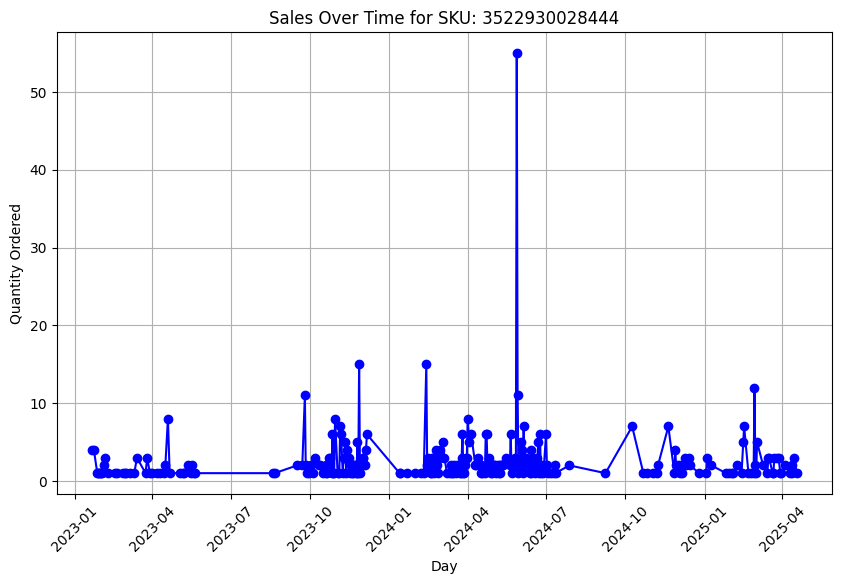

In [15]:
# Plot sales over time for SKU: 3522930028444
sku_data = remaining_skus[remaining_skus["sku"] == "3522930028444"]


plt.figure(figsize=(10, 6))
plt.plot(sku_data['day'], sku_data['qty_ordered'], marker='o', linestyle='-', color='b')
plt.title('Sales Over Time for SKU: 3522930028444')
plt.xlabel('Day')
plt.ylabel('Quantity Ordered')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

C:\Users\ruims\AppData\Local\Temp\ipykernel_18792\3205695248.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sku_data['month'] = sku_data['day'].apply(lambda x: x.strftime('%Y-%m'))


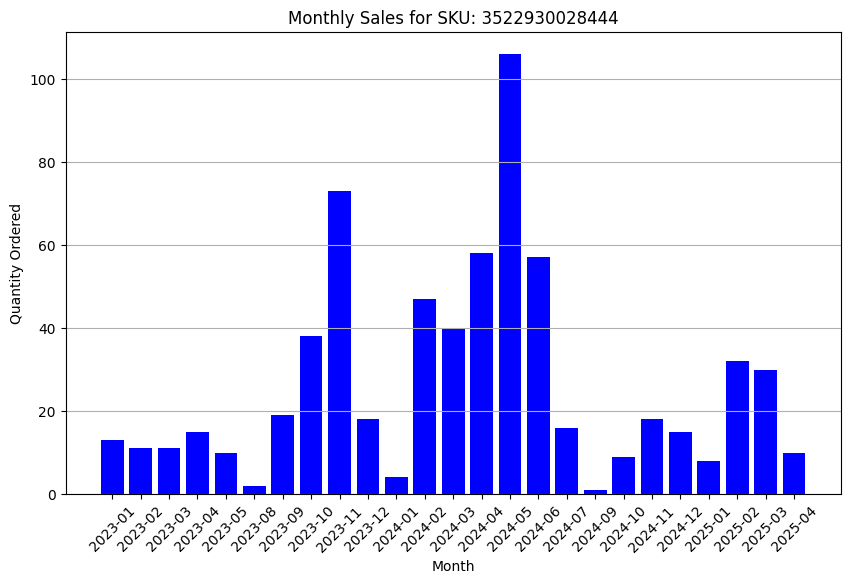

In [16]:
# Aggregate sales per month for SKU: 3522930028444
sku_data['month'] = sku_data['day'].apply(lambda x: x.strftime('%Y-%m'))
monthly_sales = sku_data.groupby('month').agg({'qty_ordered': 'sum'}).reset_index()

# Plot monthly sales
plt.figure(figsize=(10, 6))
plt.bar(monthly_sales['month'], monthly_sales['qty_ordered'], color='blue')
plt.title('Monthly Sales for SKU: 3522930028444')
plt.xlabel('Month')
plt.ylabel('Quantity Ordered')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

Mean Absolute Percentage Error (MAPE): 236.42%


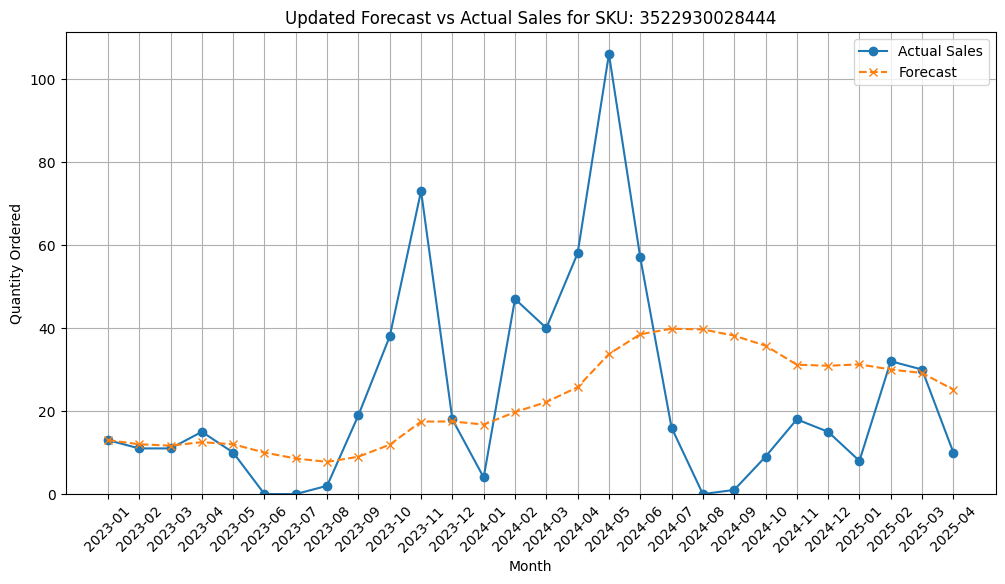

In [17]:
# Debug and ensure filtering and plotting logic works correctly
# Ensure all months until the cut-off date are included
last_sales_month = last_sales_date.strftime('%Y-%m')
start_date = pd.Timestamp('2023-01-01')
all_months = pd.date_range(start=start_date, end=last_sales_date, freq='MS').strftime('%Y-%m').tolist()
all_months_df = pd.DataFrame({'month': all_months})

# Merge with the existing monthly_sales DataFrame
monthly_sales = all_months_df.merge(monthly_sales, on='month', how='left')

# Remove forecast line for the initial year
initial_year = last_sales_date.year
monthly_sales.loc[monthly_sales['month'].str.startswith(str(initial_year)), 'forecast'] = None

# Ensure months with no sales show as 0
monthly_sales['qty_ordered'] = monthly_sales['qty_ordered'].fillna(0)

# Calculate forecast as the average of the last 12 months (including zeros)
monthly_sales['forecast'] = monthly_sales['qty_ordered'].rolling(window=12, min_periods=1).mean()

# Compute MAPE (Mean Absolute Percentage Error)
def compute_mape(actual, forecast):
    mask = actual != 0  # Avoid division by zero
    return (abs((actual[mask] - forecast[mask]) / actual[mask])).mean() * 100

mape = compute_mape(monthly_sales['qty_ordered'], monthly_sales['forecast'])
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")

# Check if data is available for plotting
if monthly_sales.empty:
    print("No data available for plotting after filtering.")
else:
    # Plot updated forecast vs actual sales
    plt.figure(figsize=(12, 6))
    plt.plot(monthly_sales['month'], monthly_sales['qty_ordered'], marker='o', label='Actual Sales')
    plt.plot(monthly_sales['month'], monthly_sales['forecast'], marker='x', label='Forecast', linestyle='--')
    plt.title('Updated Forecast vs Actual Sales for SKU: 3522930028444')
    plt.xlabel('Month')
    plt.ylabel('Quantity Ordered')
    plt.xticks(rotation=45)
    plt.ylim(bottom=0)  # Ensure the y-axis starts at 0
    plt.legend()
    plt.grid(True)
    plt.show()

In [18]:
# Compute forecast and MAPE for all SKUs
# Group data by SKU and calculate forecast and MAPE for each SKU
sku_results = []

def compute_mape(actual, forecast):
    mask = actual != 0  # Avoid division by zero
    return (abs((actual[mask] - forecast[mask]) / actual[mask])).mean() * 100

for sku, group in remaining_skus.groupby('sku'):
    # Ensure all months until the cut-off date are included
    all_months_df = pd.DataFrame({'month': all_months})
    group['month'] = group['day'].apply(lambda x: x.strftime('%Y-%m'))
    monthly_sales = all_months_df.merge(
        group.groupby('month').agg({'qty_ordered': 'sum'}).reset_index(),
        on='month', how='left'
    )

    # Fill missing sales with 0
    monthly_sales['qty_ordered'] = monthly_sales['qty_ordered'].fillna(0)

    # Calculate forecast as the average of the last 12 months (including zeros)
    monthly_sales['forecast'] = monthly_sales['qty_ordered'].rolling(window=12, min_periods=1).mean()

    # Compute MAPE
    mape = compute_mape(monthly_sales['qty_ordered'], monthly_sales['forecast'])
    sku_results.append({'sku': sku, 'mape': mape})

# Convert results to DataFrame
sku_results_df = pd.DataFrame(sku_results)

# Display the MAPE for all SKUs
print(sku_results_df.sort_values(by='mape'))

                          sku         mape
4008            4059729041388    24.980159
3993            4059729037411    25.000000
4838            4251232221749    25.000000
1043                  2015661    26.049603
3955            4059729004949    26.056548
...                       ...          ...
6869            7046110075067   461.142677
8199                  7405571   806.289913
7529                  7272971  1040.675175
12621  AltruistSPF30200SINGLE  1484.529396
16171            gift-voucher  9000.727225

[16205 rows x 2 columns]


Mean Absolute Percentage Error (MAPE) for SKU 7771717: 68.96%


C:\Users\ruims\AppData\Local\Temp\ipykernel_18792\1745100617.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sku_data['month'] = sku_data['day'].apply(lambda x: x.strftime('%Y-%m'))


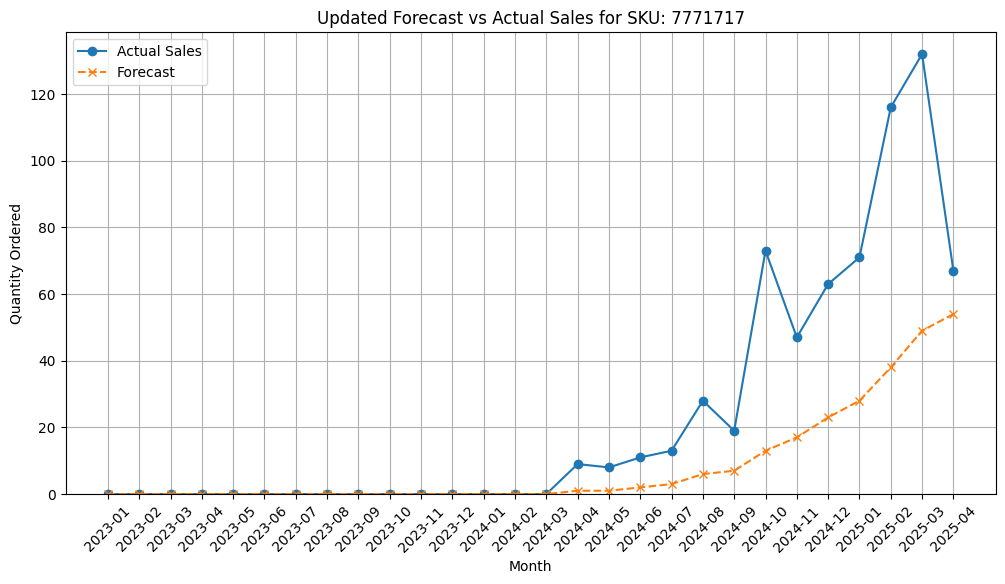

In [19]:
# Define the SKU to analyze
sku_to_analyze = "7771717"  # Replace with the desired SKU

# Filter data for the selected SKU
sku_data = remaining_skus[remaining_skus["sku"] == sku_to_analyze]

# Ensure all months until the cut-off date are included
last_sales_month = last_sales_date.strftime('%Y-%m')
start_date = pd.Timestamp('2023-01-01')
all_months = pd.date_range(start=start_date, end=last_sales_date, freq='MS').strftime('%Y-%m').tolist()
all_months_df = pd.DataFrame({'month': all_months})

# Aggregate sales per month for the selected SKU
sku_data['month'] = sku_data['day'].apply(lambda x: x.strftime('%Y-%m'))
monthly_sales = all_months_df.merge(
    sku_data.groupby('month').agg({'qty_ordered': 'sum'}).reset_index(),
    on='month', how='left'
)

# Ensure months with no sales show as 0
monthly_sales['qty_ordered'] = monthly_sales['qty_ordered'].fillna(0)

# Calculate forecast as the average of the last 12 months (including zeros) and round it
monthly_sales['forecast'] = monthly_sales['qty_ordered'].rolling(window=12, min_periods=1).mean().round()

# Compute MAPE (Mean Absolute Percentage Error)
def compute_mape(actual, forecast):
    mask = actual != 0  # Avoid division by zero
    return (abs((actual[mask] - forecast[mask]) / actual[mask])).mean() * 100

mape = compute_mape(monthly_sales['qty_ordered'], monthly_sales['forecast'])
print(f"Mean Absolute Percentage Error (MAPE) for SKU {sku_to_analyze}: {mape:.2f}%")

# Check if data is available for plotting
if monthly_sales.empty:
    print("No data available for plotting after filtering.")
else:
    # Plot updated forecast vs actual sales
    plt.figure(figsize=(12, 6))
    plt.plot(monthly_sales['month'], monthly_sales['qty_ordered'], marker='o', label='Actual Sales')
    plt.plot(monthly_sales['month'], monthly_sales['forecast'], marker='x', label='Forecast', linestyle='--')
    plt.title(f'Updated Forecast vs Actual Sales for SKU: {sku_to_analyze}')
    plt.xlabel('Month')
    plt.ylabel('Quantity Ordered')
    plt.xticks(rotation=45)
    plt.ylim(bottom=0)  # Ensure the y-axis starts at 0
    plt.legend()
    plt.grid(True)
    plt.show()

In [20]:
total_sold_per_sku = remaining_skus.groupby('sku')['qty_ordered'].sum().reset_index()
total_sold_per_sku

,sku,qty_ordered
0,000266EV,15.0
1,000273EV,12.0
2,000280EV,10.0
3,001423EV,9.0
4,001744EV,5.0
...,...,...
16200,transport31,69.0
16201,transport32,40.0
16202,transport33,49.0
16203,transport34,23.0


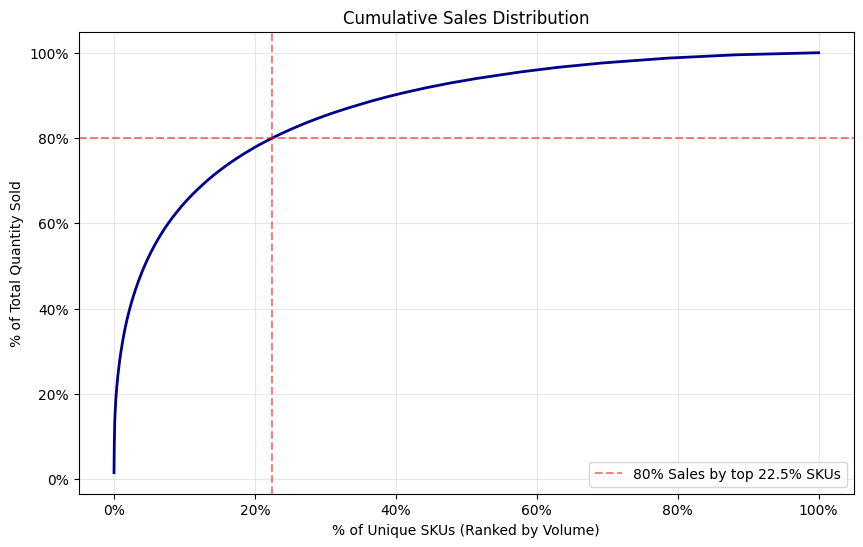

In [21]:
# 1. Sort data descending by quantity
df_sorted = total_sold_per_sku.sort_values(by='qty_ordered', ascending=False).copy()

# 2. Calculate Cumulative Sales % (Y-axis)
df_sorted['cum_sales_pct'] = (df_sorted['qty_ordered'].cumsum() / df_sorted['qty_ordered'].sum()) * 100

# 3. Calculate Cumulative SKU Count % (X-axis)
# Creates a range from 1/N to 100% (e.g., 0.006%, 0.012%... 100%)
df_sorted['sku_pct'] = (np.arange(len(df_sorted)) + 1) / len(df_sorted) * 100

# 4. Plot
fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(df_sorted['sku_pct'], df_sorted['cum_sales_pct'], color='darkblue', linewidth=2)

# Formatting
ax.set_title('Cumulative Sales Distribution')
ax.set_xlabel('% of Unique SKUs (Ranked by Volume)')
ax.set_ylabel('% of Total Quantity Sold')

# Format axes as percentages
ax.xaxis.set_major_formatter(mtick.PercentFormatter())
ax.yaxis.set_major_formatter(mtick.PercentFormatter())

# Add a visual reference for the "80/20 Rule"
# Find the % of SKUs that make up 80% of sales
sku_cutoff = df_sorted[df_sorted['cum_sales_pct'] >= 80]['sku_pct'].iloc[0]
plt.axvline(x=sku_cutoff, color='red', linestyle='--', alpha=0.5, label=f'80% Sales by top {sku_cutoff:.1f}% SKUs')
plt.axhline(y=80, color='red', linestyle='--', alpha=0.5)

plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

In [22]:
# Define cutoffs
# A = Top 80% of sales
# B = Next 15% (up to 95%)
# C = Bottom 5% of sales

def categorize_sku(cum_pct):
    if cum_pct <= 80:
        return 'A'
    elif cum_pct <= 95:
        return 'B'
    else:
        return 'C'

# Apply function
df_sorted['abc_class'] = df_sorted['cum_sales_pct'].apply(categorize_sku)

# Quick summary to verify
print(df_sorted['abc_class'].value_counts())
print("\nStats per Class:")
print(df_sorted.groupby('abc_class')['qty_ordered'].agg(['count', 'sum']))

# Save back to a variable you can use later
categorized_data = df_sorted

abc_class
C    7192
B    5373
A    3640
Name: count, dtype: int64

Stats per Class:
           count       sum
abc_class                 
A           3640  311444.0
B           5373   58410.0
C           7192   19472.0


In [23]:
# 1. Ensure strictly datetime
remaining_skus['day'] = pd.to_datetime(remaining_skus['day'])

# 2. Define the global End Date (The Cutoff)
# We still need a global start for the grid generation, but we will filter it later
global_start = remaining_skus['day'].min()
global_end = remaining_skus['day'].max()

# 3. Determine the "Birth Date" for every SKU
# This finds the very first day each specific product was sold
sku_start_dates = remaining_skus.groupby('sku')['day'].min().rename('first_sale_date')

# 4. Create the Full Grid (Cartesian Product)
# We temporarily create rows for ALL dates for ALL products
all_dates = pd.date_range(start=global_start, end=global_end, freq='D')
all_skus = remaining_skus['sku'].unique()

full_index = pd.MultiIndex.from_product(
    [all_dates, all_skus], 
    names=['day', 'sku']
)

# 5. Apply the Grid (Fill everything with 0s first)
# Note: Aggregate first to handle any duplicates
clean_sales = remaining_skus.groupby(['day', 'sku'])['qty_ordered'].sum()

df_lifecycle = (
    clean_sales
    .reindex(full_index, fill_value=0)
    .reset_index()
)

# 6. The "Trim" Step: Remove days before the product existed
# Merge the birth dates into the main dataframe
df_lifecycle = df_lifecycle.merge(sku_start_dates, on='sku', how='left')

# Keep only rows where the Date is >= the Product's First Sale Date
df_lifecycle = df_lifecycle[df_lifecycle['day'] >= df_lifecycle['first_sale_date']]

# Cleanup columns
df_lifecycle = df_lifecycle.drop(columns=['first_sale_date']).sort_values(by=['sku', 'day'])

print(f"Global Range: {global_start.date()} to {global_end.date()}")
print(f"Total Rows (Lifecycle adjusted): {len(df_lifecycle)}")
df_lifecycle.head()

C:\Users\ruims\AppData\Local\Temp\ipykernel_18792\4145559306.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  remaining_skus['day'] = pd.to_datetime(remaining_skus['day'])


Global Range: 2023-01-21 to 2025-04-23
Total Rows (Lifecycle adjusted): 5662840


,day,sku,qty_ordered
6179489,2024-02-06,000266EV,1.0
6195694,2024-02-07,000266EV,0.0
6211899,2024-02-08,000266EV,0.0
6228104,2024-02-09,000266EV,0.0
6244309,2024-02-10,000266EV,0.0


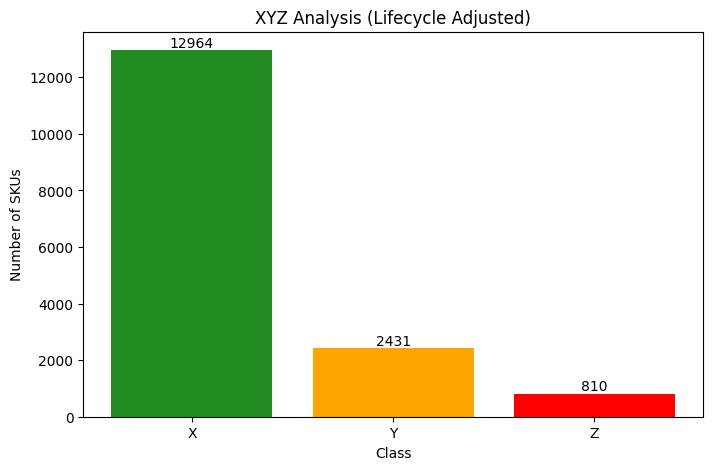

New Class Definitions (Lifecycle Adjusted):
Class X: CV Range 0.00 - 10.30
Class Y: CV Range 10.30 - 14.93
Class Z: CV Range 14.95 - 27.66


In [24]:
# --- STEP 1: RE-CALCULATE STATS FROM THE NEW LIFECYCLE DATA ---
sku_stats_new = df_lifecycle.groupby('sku')['qty_ordered'].agg(['mean', 'std'])
sku_stats_new['cv'] = sku_stats_new['std'] / sku_stats_new['mean']
sku_stats_new['cv'] = sku_stats_new['cv'].fillna(0)

# --- STEP 2: RANKING (FORCED 80/15/5) ---
sku_stats_ranked = sku_stats_new.sort_values(by='cv', ascending=True).copy()
sku_stats_ranked['rank_pct'] = sku_stats_ranked['cv'].rank(pct=True)

def get_forced_xyz(rank):
    if rank <= 0.80:
        return 'X'
    elif rank <= 0.95:
        return 'Y'
    else:
        return 'Z'

sku_stats_ranked['xyz_class'] = sku_stats_ranked['rank_pct'].apply(get_forced_xyz)

# --- STEP 3: PLOT ---
fig, ax = plt.subplots(figsize=(8, 5))
xyz_counts = sku_stats_ranked['xyz_class'].value_counts().sort_index()
colors = {'X': 'forestgreen', 'Y': 'orange', 'Z': 'red'}

bars = ax.bar(xyz_counts.index, xyz_counts.values, color=[colors[c] for c in xyz_counts.index])

ax.set_title('XYZ Analysis (Lifecycle Adjusted)')
ax.set_xlabel('Class')
ax.set_ylabel('Number of SKUs')
ax.bar_label(bars)

plt.show()

# --- STEP 4: VERIFY THE CHANGE ---
# Compare these numbers to your previous run. The "Max CV" for Class X should be lower now.
print("New Class Definitions (Lifecycle Adjusted):")
for cls in ['X', 'Y', 'Z']:
    subset = sku_stats_ranked[sku_stats_ranked['xyz_class'] == cls]
    print(f"Class {cls}: CV Range {subset['cv'].min():.2f} - {subset['cv'].max():.2f}")

MAPE for 7259986: 52.23%


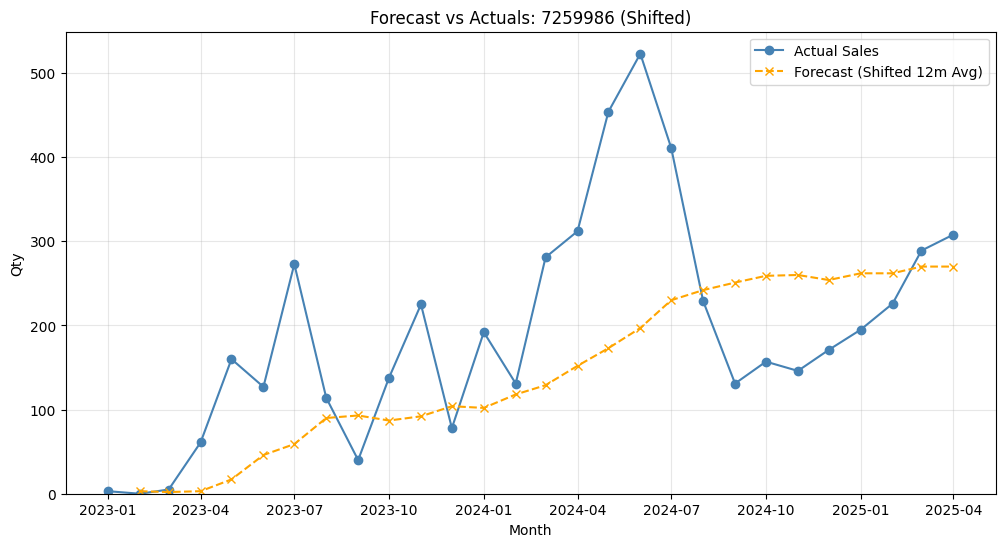


First 5 Months of Data:
       month  qty_ordered  forecast
0 2023-01-01          3.0       NaN
1 2023-02-01          0.0       3.0
2 2023-03-01          5.0       2.0
3 2023-04-01         61.0       3.0
4 2023-05-01        160.0      17.0


In [25]:
import pandas as pd
import matplotlib.pyplot as plt

# Define the SKU
sku_to_analyze = "7259986" # Example from your image

# 1. Filter the PRE-CLEANED lifecycle dataframe
sku_daily_data = df_lifecycle[df_lifecycle['sku'] == sku_to_analyze].copy()

if sku_daily_data.empty:
    print(f"No data found for SKU {sku_to_analyze} in df_lifecycle.")
else:
    # 2. Resample Daily -> Monthly
    monthly_sales = (
        sku_daily_data.set_index('day')
        .resample('MS')['qty_ordered']
        .sum()
        .reset_index()
    )
    monthly_sales.rename(columns={'day': 'month'}, inplace=True)

    # 3. Calculate Forecast (Rolling Average -> Shifted)
    # Step A: Calculate the moving average of the PREVIOUS 12 months
    # Step B: .shift(1) moves the result down one row. 
    #         So the avg of Jan becomes the forecast for Feb.
    monthly_sales['forecast'] = (
        monthly_sales['qty_ordered']
        .rolling(window=12, min_periods=1)
        .mean()
        .shift(1)  # <--- THIS IS THE KEY FIX
        .round()
    )

    # 4. Compute MAPE (ignoring the first month where forecast is NaN)
    valid_data = monthly_sales.dropna(subset=['forecast'])
    
    def compute_mape(actual, forecast):
        mask = actual != 0
        if mask.sum() == 0: return 0.0
        return (abs((actual[mask] - forecast[mask]) / actual[mask])).mean() * 100

    mape = compute_mape(valid_data['qty_ordered'], valid_data['forecast'])
    print(f"MAPE for {sku_to_analyze}: {mape:.2f}%")

    # 5. Plot
    plt.figure(figsize=(12, 6))
    
    # Plot Actuals
    plt.plot(monthly_sales['month'], monthly_sales['qty_ordered'], 
             marker='o', label='Actual Sales', color='steelblue')
    
    # Plot Forecast (Note: First point will naturally be missing)
    plt.plot(monthly_sales['month'], monthly_sales['forecast'], 
             marker='x', label='Forecast (Shifted 12m Avg)', linestyle='--', color='orange')
    
    plt.title(f'Forecast vs Actuals: {sku_to_analyze} (Shifted)')
    plt.xlabel('Month')
    plt.ylabel('Qty')
    plt.ylim(bottom=0)
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()
    
    # Optional: Print the first few rows to prove the math
    print("\nFirst 5 Months of Data:")
    print(monthly_sales.head(5))

In [26]:
# 1. Resample EVERY SKU to Monthly Data
# We use the cleaned 'df_lifecycle' so we don't have pre-launch zeros
monthly_df = (
    df_lifecycle.set_index('day')
    .groupby('sku')['qty_ordered']
    .resample('MS')
    .sum()
    .reset_index()
    .rename(columns={'day': 'month'})
)

# 2. Calculate Forecast (Vectorized)
# Group by SKU, calculate 12-month rolling avg, then SHIFT by 1, then ROUND.
monthly_df = monthly_df.sort_values(by=['sku', 'month'])

monthly_df['rolling_avg'] = (
    monthly_df.groupby('sku')['qty_ordered']
    .rolling(window=12, min_periods=1)
    .mean()
    .reset_index(level=0, drop=True)
)

monthly_df['forecast'] = monthly_df.groupby('sku')['rolling_avg'].shift(1).round()

# 3. Clean Data for Error Calculation
# Remove the very first month for each SKU (where forecast is NaN because of the shift)
valid_data = monthly_df.dropna(subset=['forecast']).copy()

# Calculate Absolute Error
valid_data['abs_error'] = (valid_data['qty_ordered'] - valid_data['forecast']).abs()

# ---------------------------------------------------------
# METRIC 1: AVERAGE MAPE PER SKU (Unweighted)
# ---------------------------------------------------------
# For row-level MAPE, we must avoid dividing by zero.
# We exclude months where Actual Sales = 0 from the percentage calc only.
non_zero_sales = valid_data[valid_data['qty_ordered'] > 0].copy()
non_zero_sales['ape'] = non_zero_sales['abs_error'] / non_zero_sales['qty_ordered']

# Group by SKU to get each product's average error
sku_mapes = non_zero_sales.groupby('sku')['ape'].mean() * 100

print(f"Median SKU MAPE: {sku_mapes.median():.2f}%")
print(f"Average SKU MAPE: {sku_mapes.mean():.2f}%")

# ---------------------------------------------------------
# METRIC 2: OVERALL "PORTFOLIO" MAPE (Weighted MAPE)
# ---------------------------------------------------------
# As you requested: Sum of all Absolute Errors / Sum of all Actual Sales
total_absolute_error = valid_data['abs_error'].sum()
total_actual_sales = valid_data['qty_ordered'].sum()

wmape = (total_absolute_error / total_actual_sales) * 100

print(f"\nOverall Weighted MAPE (WMAPE): {wmape:.2f}%")
print(f"(Total Absolute Error: {int(total_absolute_error):,} / Total Volume: {int(total_actual_sales):,})")

Median SKU MAPE: 61.25%
Average SKU MAPE: 68.97%

Overall Weighted MAPE (WMAPE): 84.79%
(Total Absolute Error: 301,134 / Total Volume: 355,164)


Holt-Winters MAPE (last 3 months): 13.34%


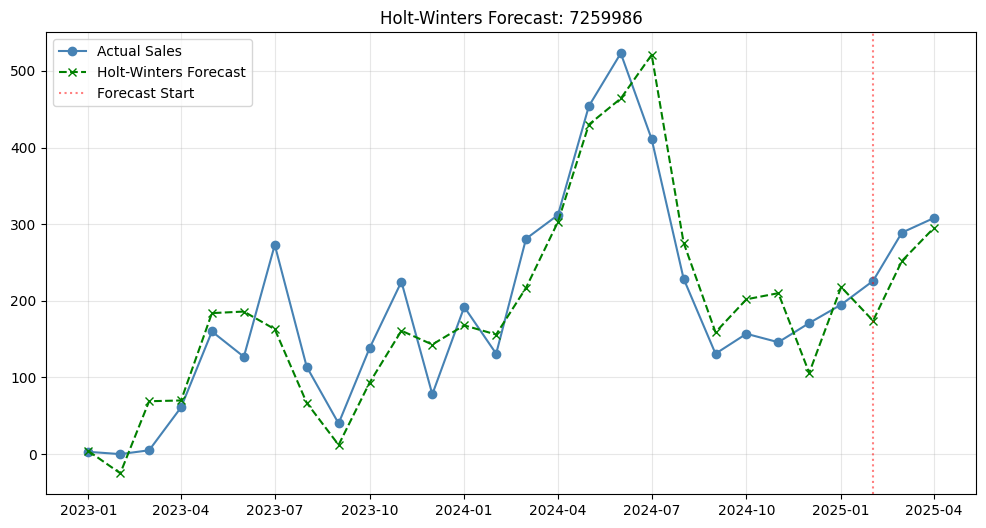

Forecasted Values (Rounded):
25    174.0
26    252.0
27    295.0
dtype: float64


In [29]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Define the SKU
sku_to_analyze = "7259986"

# 1. Filter and Prep Data
sku_daily_data = df_lifecycle[df_lifecycle['sku'] == sku_to_analyze].copy()

if sku_daily_data.empty:
    print(f"No data found for SKU {sku_to_analyze}.")
else:
    # Resample Daily -> Monthly
    monthly_sales = (
        sku_daily_data.set_index('day')
        .resample('MS')['qty_ordered']
        .sum()
        .reset_index()
    )
    monthly_sales.rename(columns={'day': 'month'}, inplace=True)

    # 2. Split Data for Training/Testing
    train_size = len(monthly_sales) - 3
    train_data = monthly_sales.iloc[:train_size]
    test_data = monthly_sales.iloc[train_size:]

    # 3. Build and Fit the Holt-Winters Model
    if len(train_data) >= 24:
        model = ExponentialSmoothing(
            train_data['qty_ordered'],
            trend='add', 
            seasonal='add', 
            seasonal_periods=12
        ).fit()

        # 4. Generate Forecast (AND ROUND)
        train_forecast = model.fittedvalues.round()
        future_forecast = model.forecast(steps=len(test_data)).round() # <--- Rounded here

        # Combine for plotting
        full_forecast = pd.concat([train_forecast, future_forecast])
        
        # 5. Calculate MAPE
        def compute_mape(actual, forecast):
            mask = actual != 0
            if mask.sum() == 0: return 0.0
            return (abs((actual[mask] - forecast[mask]) / actual[mask])).mean() * 100

        test_mape = compute_mape(test_data['qty_ordered'], future_forecast)
        print(f"Holt-Winters MAPE (last 3 months): {test_mape:.2f}%")

        # 6. Plot
        plt.figure(figsize=(12, 6))
        plt.plot(monthly_sales['month'], monthly_sales['qty_ordered'], 
                 marker='o', label='Actual Sales', color='steelblue')
        
        # Fix: Align forecast with dates properly
        forecast_dates = monthly_sales['month']
        plt.plot(forecast_dates, full_forecast.values, 
                 marker='x', label='Holt-Winters Forecast', linestyle='--', color='green')

        plt.axvline(x=test_data['month'].iloc[0], color='red', linestyle=':', alpha=0.5, label='Forecast Start')
        plt.title(f'Holt-Winters Forecast: {sku_to_analyze}')
        plt.legend()
        plt.grid(True, alpha=0.3)
        plt.show()
        
        print("Forecasted Values (Rounded):")
        print(future_forecast)
    else:
        print("Not enough data points for monthly seasonality (need 24+ months).")

In [30]:
# 1. Resample EVERY SKU to Monthly Data
monthly_df = (
    df_lifecycle.set_index('day')
    .groupby('sku')['qty_ordered']
    .resample('MS')
    .sum()
    .reset_index()
    .rename(columns={'day': 'month'})
)

# 2. Calculate Forecast (12-month rolling avg, shifted, rounded)
monthly_df = monthly_df.sort_values(by=['sku', 'month'])

monthly_df['rolling_avg'] = (
    monthly_df.groupby('sku')['qty_ordered']
    .rolling(window=12, min_periods=1)
    .mean()
    .reset_index(level=0, drop=True)
)

monthly_df['forecast'] = monthly_df.groupby('sku')['rolling_avg'].shift(1).round()

# 3. Clean Data & FILTER FOR LAST 3 MONTHS
valid_data = monthly_df.dropna(subset=['forecast']).copy()

# --- NEW STEP: Filter for the last 3 available months ---
last_month = valid_data['month'].max()
# Calculate the start date for the 3-month window (inclusive)
start_window = last_month - pd.DateOffset(months=2)

print(f"Calculating MAPE for window: {start_window.date()} to {last_month.date()}")

# Keep only the last 3 months
recent_data = valid_data[valid_data['month'] >= start_window].copy()

# 4. Calculate Errors on this subset
recent_data['abs_error'] = (recent_data['qty_ordered'] - recent_data['forecast']).abs()

# ---------------------------------------------------------
# METRIC 1: AVERAGE MAPE PER SKU (Last 3 Months)
# ---------------------------------------------------------
non_zero_sales = recent_data[recent_data['qty_ordered'] > 0].copy()
non_zero_sales['ape'] = non_zero_sales['abs_error'] / non_zero_sales['qty_ordered']

# Group by SKU to get average error over these 3 months
sku_mapes = non_zero_sales.groupby('sku')['ape'].mean() * 100

print(f"Median SKU MAPE (Last 3 Mo): {sku_mapes.median():.2f}%")
print(f"Average SKU MAPE (Last 3 Mo): {sku_mapes.mean():.2f}%")

# ---------------------------------------------------------
# METRIC 2: OVERALL "PORTFOLIO" WMAPE (Last 3 Months)
# ---------------------------------------------------------
total_absolute_error = recent_data['abs_error'].sum()
total_actual_sales = recent_data['qty_ordered'].sum()

wmape = (total_absolute_error / total_actual_sales) * 100

print(f"\nOverall Weighted MAPE (WMAPE) for Last 3 Months: {wmape:.2f}%")
print(f"(Abs Error: {int(total_absolute_error):,} / Volume: {int(total_actual_sales):,})")

Calculating MAPE for window: 2025-02-01 to 2025-04-01
Median SKU MAPE (Last 3 Mo): 55.56%
Average SKU MAPE (Last 3 Mo): 67.22%

Overall Weighted MAPE (WMAPE) for Last 3 Months: 94.14%
(Abs Error: 60,675 / Volume: 64,455)


In [31]:
# ==============================================================================
# FILTER: Remove SKUs with less than 40 sales days per year
# ==============================================================================
print("Filtering SKUs by minimum sales days per year...")

# Para cada SKU, contar quantos dias teve vendas (qty_ordered > 0)
sku_sales_days = df_lifecycle[df_lifecycle['qty_ordered'] > 0].groupby('sku')['day'].nunique().reset_index()
sku_sales_days.rename(columns={'day': 'sales_days'}, inplace=True)

# Filtrar apenas SKUs com >= 40 dias de vendas
min_sales_days = 40
filtered_skus = sku_sales_days[sku_sales_days['sales_days'] >= min_sales_days]['sku'].tolist()

print(f"Total SKUs before filter: {len(sku_sales_days)}")
print(f"SKUs with >= {min_sales_days} sales days: {len(filtered_skus)}")
print(f"SKUs removed: {len(sku_sales_days) - len(filtered_skus)}")

# Aplicar filtro ao df_lifecycle
df_lifecycle_filtered = df_lifecycle[df_lifecycle['sku'].isin(filtered_skus)].copy()

print(f"\ndf_lifecycle rows before filter: {len(df_lifecycle)}")
print(f"df_lifecycle rows after filter: {len(df_lifecycle_filtered)}")

# ===== USAR df_lifecycle_filtered PARA O RESTO DO CÓDIGO =====
# Próxima célula: substituir df_lifecycle por df_lifecycle_filtered

Filtering SKUs by minimum sales days per year...
Total SKUs before filter: 16205
SKUs with >= 40 sales days: 1175
SKUs removed: 15030

df_lifecycle rows before filter: 5662840
df_lifecycle rows after filter: 674071


5. Building seasonality profiles for clustering...
6. Executing clustering...

Cluster Distribution:
cluster
0    421
1    106
2    256
3     30
4     27
5    254
6     81
Name: count, dtype: int64

7. Generating cluster visualization...


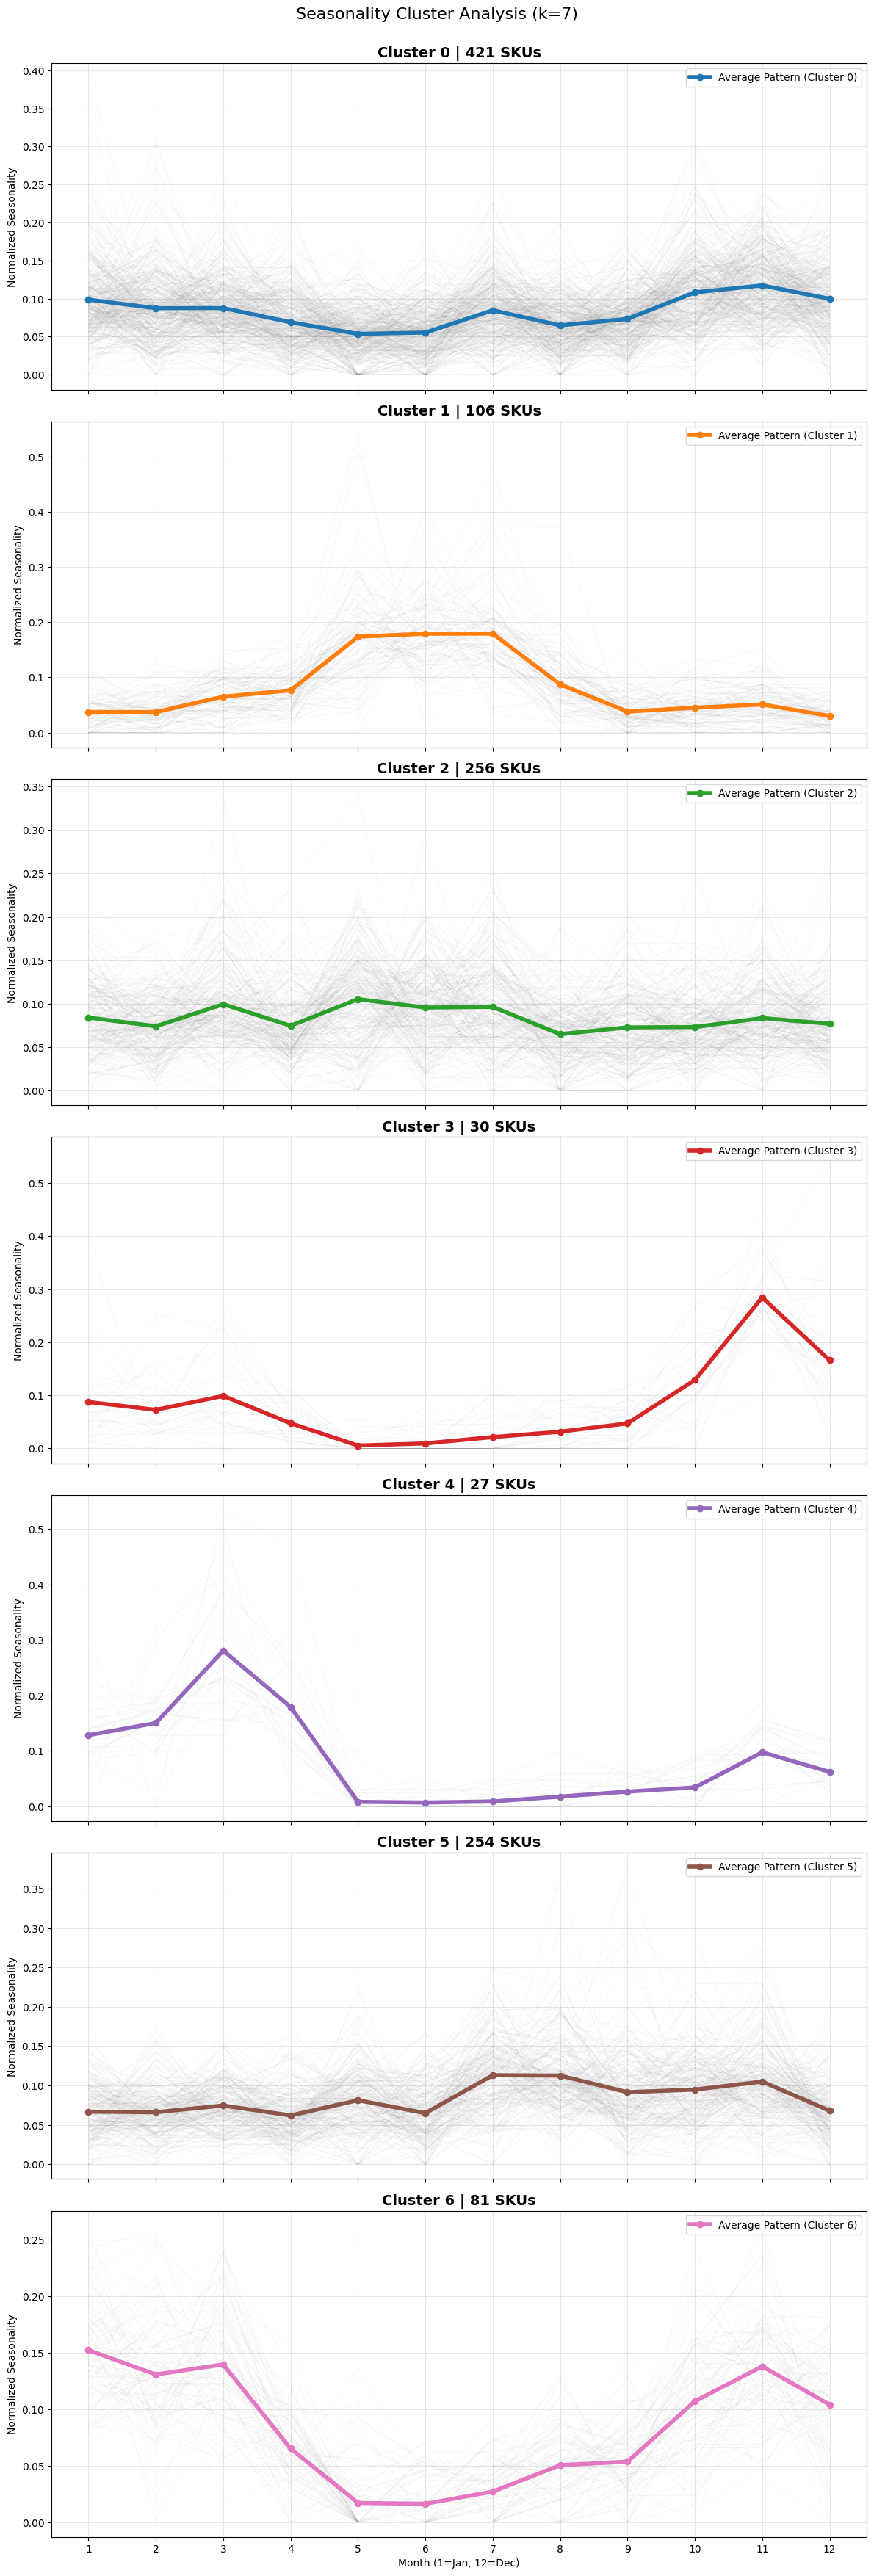


Results saved to 'sku_clusters.csv'


In [36]:
# Import required libraries
from sklearn.cluster import AgglomerativeClustering
import seaborn as sns

print("5. Building seasonality profiles for clustering...")

# Convert day to datetime if not already
df_lifecycle_filtered['day'] = pd.to_datetime(df_lifecycle_filtered['day'])

# Extract month and year for seasonal profile
df_lifecycle_filtered['month'] = df_lifecycle_filtered['day'].dt.month
df_lifecycle_filtered['year'] = df_lifecycle_filtered['day'].dt.year

# Create seasonal profile (12-month pattern)
monthly_agg = df_lifecycle_filtered.groupby(['sku', 'year', 'month'])['qty_ordered'].sum().reset_index()
seasonal_profile = monthly_agg.groupby(['sku', 'month'])['qty_ordered'].mean().reset_index()
seasonal_features = seasonal_profile.pivot(index='sku', columns='month', values='qty_ordered').fillna(0)

# Ensure all 12 months are present
for m in range(1, 13):
    if m not in seasonal_features.columns: 
        seasonal_features[m] = 0
seasonal_features = seasonal_features[sorted(seasonal_features.columns)]

# Normalize by row sum (each SKU sums to 1.0 for fair comparison)
row_sums = seasonal_features.sum(axis=1)
row_sums[row_sums == 0] = 1
seasonal_norm = seasonal_features.div(row_sums, axis=0)

print("6. Executing clustering...")

# Apply Hierarchical Agglomerative Clustering
best_k = 7

final_model = AgglomerativeClustering(n_clusters=best_k, metric='euclidean', linkage='ward')
cluster_labels = final_model.fit_predict(seasonal_norm)

# Add cluster assignment back
seasonal_norm['cluster'] = cluster_labels
seasonal_norm = seasonal_norm.reset_index()

# Display cluster distribution
print(f"\nCluster Distribution:")
print(seasonal_norm['cluster'].value_counts().sort_index())

print("\n7. Generating cluster visualization...")

# Plot cluster patterns
fig, axes = plt.subplots(nrows=best_k, ncols=1, figsize=(12, 5 * best_k), sharex=True)
if best_k == 1: 
    axes = [axes]

months = range(1, 13)

for cluster_id, ax in zip(range(best_k), axes):
    cluster_subset = seasonal_norm[seasonal_norm['cluster'] == cluster_id]
    centroid = cluster_subset.iloc[:, 1:13].mean()
    
    # Plot all SKUs in cluster with transparency
    ax.plot(months, cluster_subset.iloc[:, 1:13].T, color='gray', alpha=0.08, linewidth=0.5)
    
    # Plot centroid
    color = plt.cm.tab10(cluster_id % 10)
    ax.plot(months, centroid, color=color, linewidth=4, marker='o', 
            label=f'Average Pattern (Cluster {cluster_id})')
    
    n_skus = len(cluster_subset)
    ax.set_title(f"Cluster {cluster_id} | {n_skus} SKUs", fontsize=14, fontweight='bold')
    ax.set_ylabel("Normalized Seasonality")
    ax.grid(True, alpha=0.3)
    ax.legend(loc='upper right')

plt.xlabel("Month (1=Jan, 12=Dec)")
plt.xticks(months)
plt.suptitle(f"Seasonality Cluster Analysis (k={best_k})", fontsize=16, y=1.001)
plt.tight_layout()
plt.show()

# Save results
output_df = seasonal_norm[['sku', 'cluster']].copy()
output_df.to_csv('sku_clusters.csv', index=False)
print(f"\nResults saved to 'sku_clusters.csv'")

K     | Calinski (Maior=Melhor)   | Davies (Menor=Melhor)    
---------------------------------------------------------------------------
3     | 156.76                    | 1.7935                   
4     | 127.27                    | 2.8709                   
5     | 112.10                    | 2.5940                   
6     | 99.40                     | 2.6346                   
7     | 90.88                     | 2.4699                   
8     | 84.88                     | 2.5367                   
9     | 80.26                     | 2.4252                   
10    | 75.35                     | 2.3298                   
11    | 71.22                     | 2.3957                   
12    | 67.68                     | 2.4289                   
13    | 64.75                     | 2.4756                   
14    | 62.28                     | 2.4109                   
15    | 60.11                     | 2.2953                   


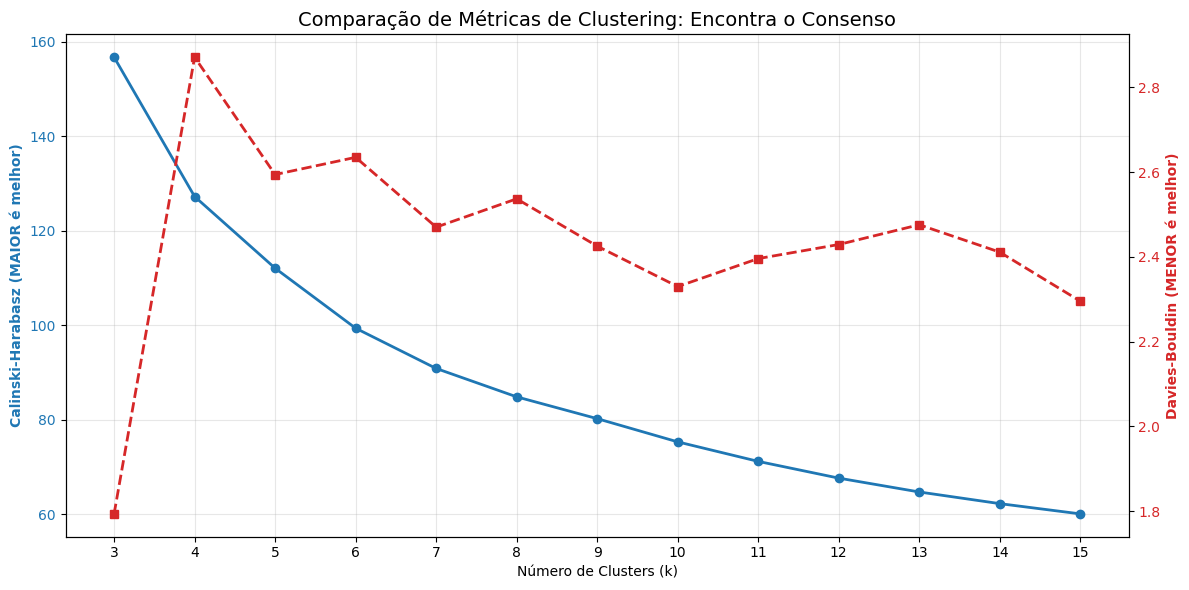

In [33]:
from sklearn.metrics import calinski_harabasz_score, davies_bouldin_score, silhouette_score
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
import numpy as np

# 1. Preparar dados
X_clustering = seasonal_norm.drop(columns=['sku', 'cluster'], errors='ignore')

# Intervalo de K a testar (ex: de 3 a 15)
K_range = range(3, 16)

# Listas para guardar resultados
results_ch = []
results_db = []
results_sil = []

print(f"{'K':<5} | {'Calinski (Maior=Melhor)':<25} | {'Davies (Menor=Melhor)':<25}")
print("-" * 75)

for k in K_range:
    # Criar e treinar modelo temporário
    model = AgglomerativeClustering(n_clusters=k, metric='euclidean', linkage='ward')
    labels = model.fit_predict(X_clustering)
    
    # Calcular Métricas
    ch_score = calinski_harabasz_score(X_clustering, labels)
    db_score = davies_bouldin_score(X_clustering, labels)
    
    results_ch.append(ch_score)
    results_db.append(db_score)
    
    print(f"{k:<5} | {ch_score:<25.2f} | {db_score:<25.4f}")

# ==============================================================================
# VISUALIZAÇÃO COMPARATIVA
# ==============================================================================
fig, ax1 = plt.subplots(figsize=(12, 6))

# Eixo esquerdo (Calinski - Escala Grande)
color = 'tab:blue'
ax1.set_xlabel('Número de Clusters (k)')
ax1.set_ylabel('Calinski-Harabasz (MAIOR é melhor)', color=color, fontweight='bold')
ax1.plot(K_range, results_ch, color=color, marker='o', linewidth=2, label='Calinski-Harabasz')
ax1.tick_params(axis='y', labelcolor=color)
ax1.grid(True, alpha=0.3)

# Eixo direito (Davies-Bouldin - Escala Pequena)
ax2 = ax1.twinx()  
color = 'tab:red'
ax2.set_ylabel('Davies-Bouldin (MENOR é melhor)', color=color, fontweight='bold')
ax2.plot(K_range, results_db, color=color, marker='s', linestyle='--', linewidth=2, label='Davies-Bouldin')
ax2.tick_params(axis='y', labelcolor=color)

plt.title('Comparação de Métricas de Clustering: Encontra o Consenso', fontsize=14)
fig.tight_layout()
plt.xticks(K_range)
plt.show()

(Escolher o 5 ou o 7, por serem vales)

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import timedelta
import warnings
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
import tensorflow as tf

warnings.filterwarnings('ignore')

# Global Configurations
WINDOW_SIZE = 60    # Days of history the model sees
HORIZON = 30        # Days to predict into the future
TEST_DAYS = 90      # Validation period (Last 3 months)
N_ENSEMBLE = 5      # Number of models to train per cluster (Ensemble)

print("Libraries loaded and configurations set.")

Libraries loaded and configurations set.


In [40]:
# ==============================================================================
# 1. DATA PREPARATION
# ==============================================================================
print("1. Preparing data...")

# Ensure you have 'seasonal_norm' and 'df_lifecycle' from previous steps
seasonal_norm_data = seasonal_norm[['sku', 'cluster']].copy()
df_with_clusters = df_lifecycle.merge(seasonal_norm_data, on='sku', how='left')

# Aggregate sales by Day and Cluster
daily_sales_clusters = df_with_clusters.groupby(['day', 'cluster'])['qty_ordered'].sum().reset_index()
daily_sales_clusters['day'] = pd.to_datetime(daily_sales_clusters['day'])

# Fill missing dates to ensure time continuity (Crucial for Time Series)
idx = pd.date_range(daily_sales_clusters['day'].min(), daily_sales_clusters['day'].max())
daily_sales_clusters = daily_sales_clusters.set_index('day').groupby('cluster').apply(
    lambda x: x.reindex(idx, fill_value=0).drop(columns=['cluster'])
).reset_index()

# Rename columns and add features
daily_sales_clusters.rename(columns={'level_1': 'day'}, inplace=True)
daily_sales_clusters['month'] = daily_sales_clusters['day'].dt.month

print(f"Data prepared: {len(daily_sales_clusters)} rows")
print(f"Data Range: {daily_sales_clusters['day'].min().date()} to {daily_sales_clusters['day'].max().date()}")

1. Preparing data...
Data prepared: 5768 rows
Data Range: 2023-01-21 to 2025-04-23


In [41]:
# ==============================================================================
# 2. CALCULATE SEASONAL BASELINE (NO DATA LEAKAGE)
# ==============================================================================
print("2. Calculating Seasonal Baselines (Train Data Only)...")

monthly_avg_map = {}

# Define Cutoff Date: Everything in the Test Period (Last 90 days) is IGNORED for averages
cutoff_date = daily_sales_clusters['day'].max() - pd.Timedelta(days=TEST_DAYS)
print(f"   Training Cutoff Date for Seasonality: {cutoff_date.date()}")

for cid in daily_sales_clusters['cluster'].unique():
    # CRITICAL FILTER: Use only data BEFORE the test period
    c_data_train = daily_sales_clusters[
        (daily_sales_clusters['cluster'] == cid) & 
        (daily_sales_clusters['day'] <= cutoff_date)
    ]
    
    # Calculate average using only past data
    # Fallback to full data if cluster is too new (edge case)
    if c_data_train.empty:
        monthly_avg = daily_sales_clusters[daily_sales_clusters['cluster'] == cid].groupby('month')['qty_ordered'].mean().to_dict()
    else:
        monthly_avg = c_data_train.groupby('month')['qty_ordered'].mean().to_dict()
        
    monthly_avg_map[cid] = monthly_avg

def get_day_baseline(cluster, month):
    return monthly_avg_map[cluster].get(month, 0)

print("   Baselines calculated successfully.")

2. Calculating Seasonal Baselines (Train Data Only)...
   Training Cutoff Date for Seasonality: 2025-01-23
   Baselines calculated successfully.


In [42]:
# ==============================================================================
# 3. HELPER FUNCTIONS: DATASET & MODEL
# ==============================================================================

def create_residual_dataset(data_df, cluster_id, window_size=60, horizon=30):
    """
    Creates the dataset where Target = Actual - Seasonal_Baseline.
    The model learns to predict the residual (the difference).
    """
    c_data = data_df[data_df['cluster'] == cluster_id].sort_values('day')
    
    vals_real = c_data['qty_ordered'].values
    months = c_data['month'].values
    dates = c_data['day'].values
    
    X, y_resid, y_base_future, y_real_future, target_dates = [], [], [], [], []
    
    limit = len(vals_real) - horizon + 1
    
    for i in range(window_size, limit):
        # Input: Past window
        X.append(vals_real[i-window_size:i])
        
        # Calculate Future Baseline Sum
        baseline_sum = 0
        for d in range(horizon):
            future_idx = i + d
            if future_idx < len(months):
                m = months[future_idx]
                baseline_sum += get_day_baseline(cluster_id, m)
        
        # Real Target Sum
        real_sum = np.sum(vals_real[i : i+horizon])
        
        # The Residual (What the network learns)
        y_resid.append(real_sum - baseline_sum)
        y_base_future.append(baseline_sum)
        y_real_future.append(real_sum)
        target_dates.append(dates[i])
        
    return np.array(X), np.array(y_resid), np.array(y_base_future), np.array(y_real_future), vals_real, np.array(target_dates)

def build_model(input_dim):
    """
    Builds a robust Feed-Forward Neural Network.
    """
    model = Sequential([ 
        Dense(64, activation='relu', input_dim=input_dim),
        BatchNormalization(),
        Dropout(0.2), # Dropout is crucial for Ensemble diversity
        Dense(32, activation='relu'),
        Dense(1, activation='linear') # Linear output allows negative residuals
    ])
    model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')
    return model

print("Functions defined.")

Functions defined.


In [43]:
# ==============================================================================
# 4. TRAINING RESIDUAL NETWORK (ENSEMBLE 5x) - WITH SAFETY GAP
# ==============================================================================
print("\n" + "="*50)
print(f"4. TRAINING STARTED (ENSEMBLE {N_ENSEMBLE}x) - WITH 30-DAY GAP")
print("="*50) 

metrics_list = []
validation_results = []
future_preds = []

for cid in sorted(daily_sales_clusters['cluster'].unique()):
    print(f"\nCluster {cid}:")
    
    # 1. Create Data
    X, y_resid, y_base, y_real, all_vals, t_dates = create_residual_dataset(
        daily_sales_clusters, cid, WINDOW_SIZE, HORIZON
    )
    
    # 2. Define Split Points
    # Test starts at the last 90 days
    split_test_start = len(y_real) - TEST_DAYS
    
    if split_test_start < 10: 
        print("   Skipped: Insufficient Data")
        continue
    
    # CORRECTION: Training must end 30 days BEFORE the test starts.
    # Why? Because on the last training day, we need to know the target (next 30 days).
    # If we trained up to the day before test, we would be using future data as target.
    split_train_end = split_test_start - HORIZON
    
    # Validate Dates
    last_train_date = pd.to_datetime(t_dates[split_train_end-1])
    first_test_date = pd.to_datetime(t_dates[split_test_start])
    
    print(f"   Last Train Input Date: {last_train_date.date()}")
    print(f"   First Test Input Date: {first_test_date.date()}")
    print(f"   (Gap of {HORIZON} days ensures no target leakage)")
    
    # Split Train/Test
    X_train = X[:split_train_end]           # Train ends earlier
    y_train_resid = y_resid[:split_train_end]
    
    X_test = X[split_test_start:]           # Test starts at cutoff
    X_test_resid = y_resid[split_test_start:] # Not used for prediction, just validation logic
    
    y_base_test = y_base[split_test_start:]
    y_real_test = y_real[split_test_start:]
    t_dates_test = t_dates[split_test_start:]
    
    # Scaling
    mean_X = X_train.mean()
    std_X = X_train.std() + 1e-5
    X_train_sc = (X_train - mean_X) / std_X
    X_test_sc = (X_test - mean_X) / std_X
    
    # --- ENSEMBLE LOOP ---
    print(f"   Training {N_ENSEMBLE} models...")
    preds_test_collection = []
    preds_future_collection = []
    
    # Prepare Future Input (Last available window)
    last_window = all_vals[-WINDOW_SIZE:].reshape(1, -1)
    last_window_sc = (last_window - mean_X) / std_X
    
    for i in range(N_ENSEMBLE):
        model = build_model(WINDOW_SIZE)
        early_stop = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)
        
        model.fit(X_train_sc, y_train_resid, 
                  validation_split=0.1, 
                  epochs=40, 
                  batch_size=16, 
                  verbose=0, 
                  callbacks=[early_stop])
        
        # Predict Test
        preds_test_collection.append(model.predict(X_test_sc, verbose=0).flatten())
        # Predict Future
        preds_future_collection.append(model.predict(last_window_sc, verbose=0)[0][0])
    
    # Average Predictions (Ensemble)
    avg_pred_resid = np.mean(preds_test_collection, axis=0)
    avg_future_resid = np.mean(preds_future_collection)
    
    # Final Reconstruction: Baseline + Predicted Residual
    preds_final = np.maximum(y_base_test + avg_pred_resid, 0)
    
    # Calculate MAPE (Mean Absolute Percentage Error)
    mape = (np.sum(np.abs(y_real_test - preds_final)) / (np.sum(y_real_test) + 1)) * 100
    print(f"   Ensemble MAPE (Test): {mape:.2f}%")
    metrics_list.append({'cluster': cid, 'MAPE': mape})
    
    # Store Results
    validation_results.append(pd.DataFrame({
        'day': t_dates_test,
        'cluster': cid,
        'actual': y_real_test,
        'forecast': preds_final,
        'baseline': y_base_test
    }))
    
    # Calculate Future Forecast (Next 30 Days)
    last_date = daily_sales_clusters['day'].max()
    future_baseline_sum = 0
    for d in range(1, 31):
        fut_date = last_date + timedelta(days=d)
        future_baseline_sum += get_day_baseline(cid, fut_date.month)
        
    final_forecast = max(0, future_baseline_sum + avg_future_resid)
    print(f"   Forecast (next 30d): {final_forecast:.0f}")
    future_preds.append({'cluster': cid, 'forecast_30days': final_forecast})


4. TRAINING STARTED (ENSEMBLE 5x) - WITH 30-DAY GAP

Cluster 0.0:
   Last Train Input Date: 2024-11-25
   First Test Input Date: 2024-12-26
   (Gap of 30 days ensures no target leakage)
   Training 5 models...
   Ensemble WAPE (Test): 11.99%
   Forecast (next 30d): 2832

Cluster 1.0:
   Last Train Input Date: 2024-11-25
   First Test Input Date: 2024-12-26
   (Gap of 30 days ensures no target leakage)
   Training 5 models...
   Ensemble WAPE (Test): 40.82%
   Forecast (next 30d): 2003

Cluster 2.0:
   Last Train Input Date: 2024-11-25
   First Test Input Date: 2024-12-26
   (Gap of 30 days ensures no target leakage)
   Training 5 models...
   Ensemble WAPE (Test): 13.52%
   Forecast (next 30d): 2804

Cluster 3.0:
   Last Train Input Date: 2024-11-25
   First Test Input Date: 2024-12-26
   (Gap of 30 days ensures no target leakage)
   Training 5 models...
   Ensemble WAPE (Test): 59.77%
   Forecast (next 30d): 527

Cluster 4.0:
   Last Train Input Date: 2024-11-25
   First Test Input D

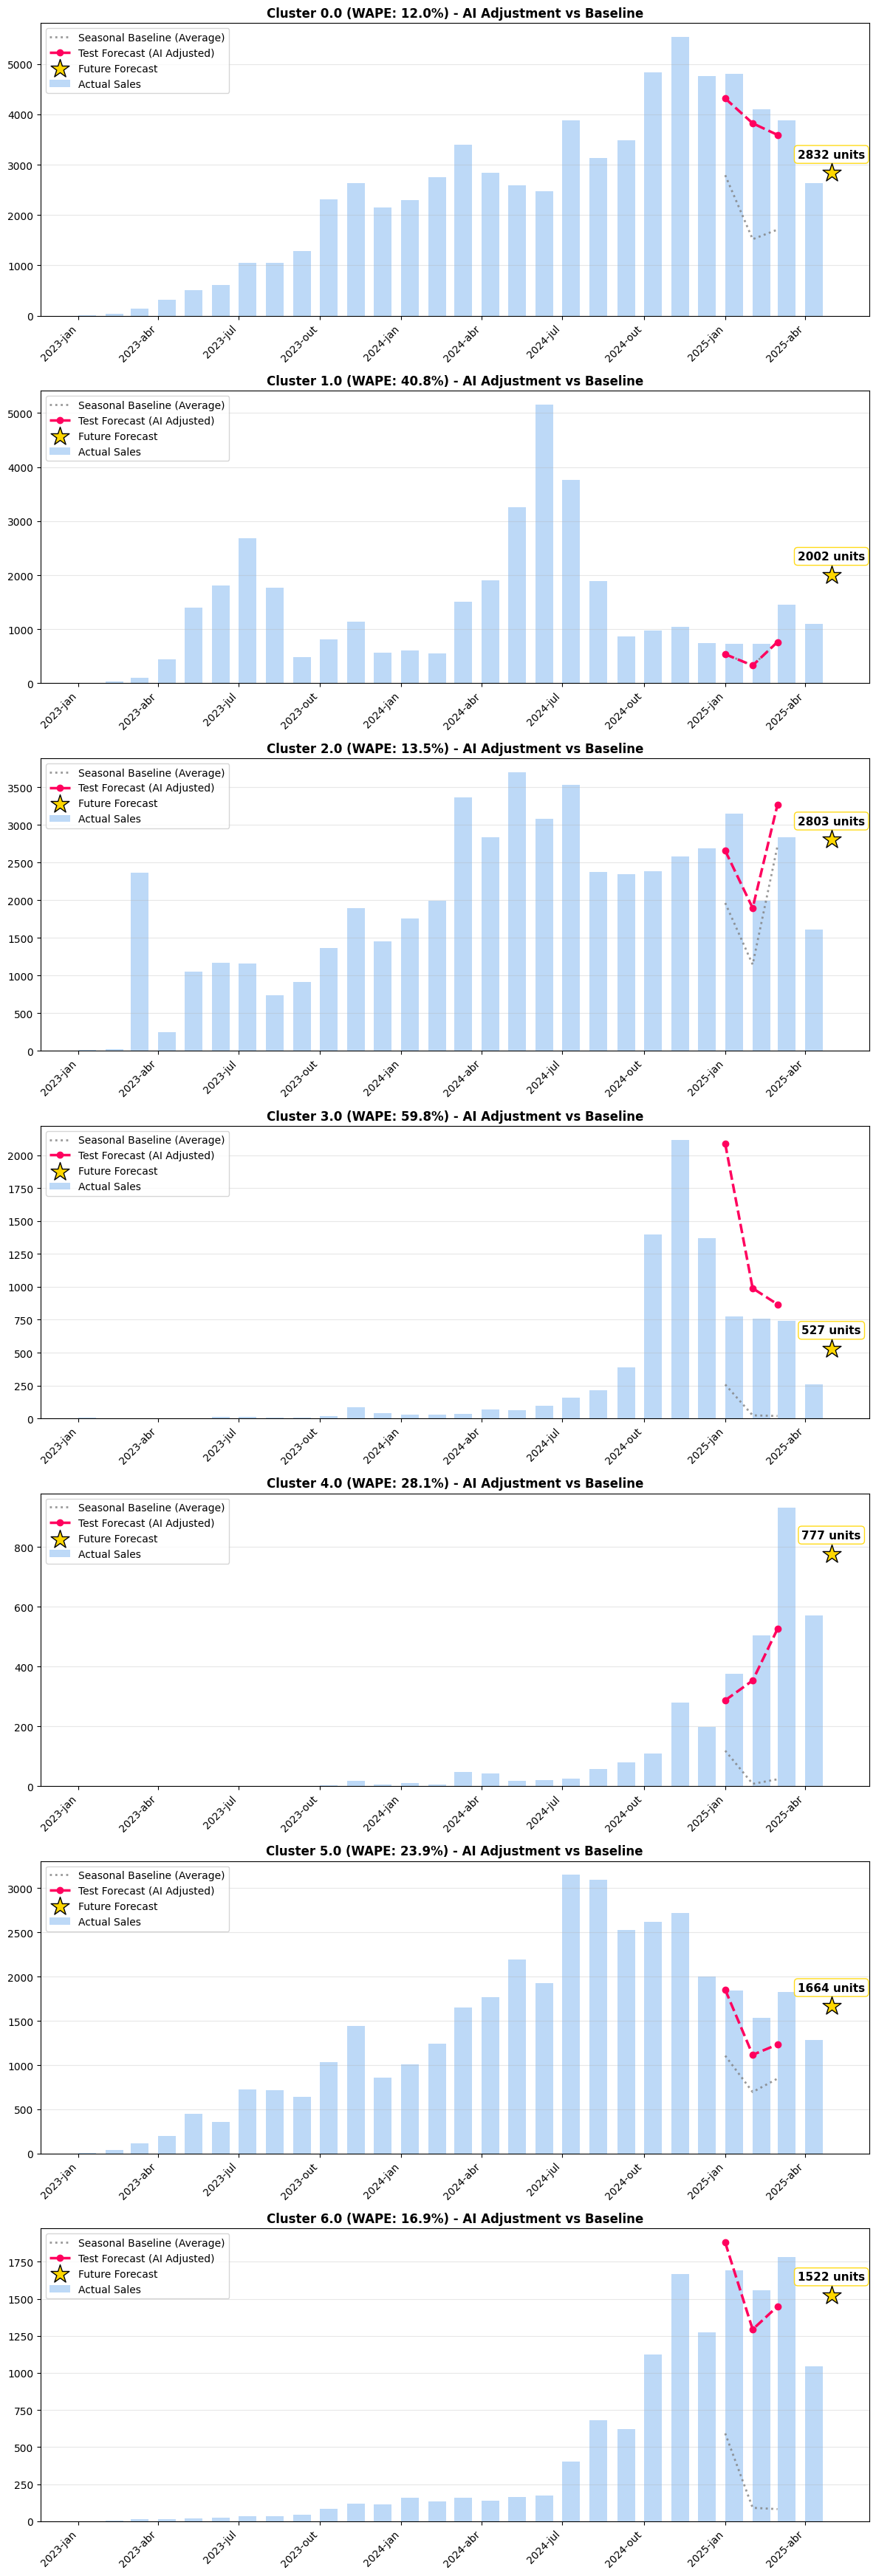

Forecasts saved to 'cluster_forecasts_final_validated.csv'


In [49]:
# ==============================================================================
# 5. VISUALIZATION (OPTIMIZED WITH BASELINE)
# ==============================================================================
if validation_results:
    val_df_all = pd.concat(validation_results, ignore_index=True)
    n_clusters = len(metrics_list)
    fig, axes = plt.subplots(nrows=n_clusters, ncols=1, figsize=(12, 5 * n_clusters))
    if n_clusters == 1: axes = [axes]
    
    for i, m in enumerate(metrics_list):
        cid = m['cluster']
        ax = axes[i]
        
        # Prepare Actual Data
        raw_data = daily_sales_clusters[daily_sales_clusters['cluster'] == cid].copy()
        raw_data['day'] = pd.to_datetime(raw_data['day'])
        
        # Resample to Monthly (Start of Month) - Show ALL months
        monthly_actuals = raw_data.set_index('day')['qty_ordered'].resample('MS').sum()
        
        # Prepare Test Forecast (Shifted for visual alignment)
        val_data = val_df_all[val_df_all['cluster'] == cid].copy()
        val_data['day'] = pd.to_datetime(val_data['day'])
        monthly_forecast = val_data.set_index('day')['forecast'].resample('MS').last().shift(1)
        
        # --- NEW: Prepare Baseline for Plotting ---
        # We apply the exact same logic/shift as the forecast to align them
        monthly_baseline = val_data.set_index('day')['baseline'].resample('MS').last().shift(1)
        
        # Prepare Future Forecast (The Star)
        future_val = next(item for item in future_preds if item["cluster"] == cid)['forecast_30days']
        last_data_date = raw_data['day'].max()
        future_date = (last_data_date.replace(day=1) + pd.DateOffset(months=1))
        
        # Plotting
        # 1. Actual Bars
        ax.bar(monthly_actuals.index, monthly_actuals.values, width=20, color='#a1c9f4', label='Actual Sales', align='edge', alpha=0.7)
        
        # 2. Baseline Line (The "Normal" Sazonal) - Grey Dotted
        # Intersect indexes to ensure we only plot where we have data
        common_base = monthly_actuals.index.intersection(monthly_baseline.index)
        if len(common_base) > 0:
             ax.plot(monthly_baseline.index, monthly_baseline.values, color='gray', linestyle=':', linewidth=2, label='Seasonal Baseline (Average)', alpha=0.8)

        # 3. Test Forecast Line (The AI Prediction) - Pink Dashed
        common = monthly_actuals.index.intersection(monthly_forecast.index)
        if len(common) > 0:
            ax.plot(monthly_forecast.index, monthly_forecast.values, color='#ff005e', marker='o', linestyle='--', linewidth=2.5, label='Test Forecast (AI Adjusted)')
        
        # 4. Future Star
        ax.scatter([future_date], [future_val], color='gold', marker='*', s=350, edgecolors='black', zorder=10, label='Future Forecast')
        ax.annotate(f"{int(future_val)} units", 
                    (future_date, future_val), 
                    xytext=(0, 15), textcoords='offset points', ha='center',
                    fontsize=11, fontweight='bold', bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="gold", alpha=0.9))

        ax.set_title(f"Cluster {cid} (MAPE: {m['MAPE']:.1f}%) - AI Adjustment vs Baseline", fontsize=12, fontweight='bold')
        ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%b'))
        ax.xaxis.set_major_locator(mdates.MonthLocator(interval=3))  # Show every 3 months
        ax.legend(loc='upper left')
        ax.grid(True, axis='y', alpha=0.3)
        plt.setp(ax.xaxis.get_majorticklabels(), rotation=45, ha='right')  # Rotate labels
        
    plt.tight_layout()
    plt.show()
    
    # Save CSV
    pd.DataFrame(future_preds).to_csv('cluster_forecasts_final_validated.csv', index=False)
    print("Forecasts saved to 'cluster_forecasts_final_validated.csv'")

In [55]:
# ==============================================================================
# 6. GLOBAL METRICS CALCULATION (Cluster Level)
# ==============================================================================
if validation_results:
    print("\n" + "="*50)
    print(f"GLOBAL METRICS - FULL TEST PERIOD ({TEST_DAYS} DAYS)")
    print("="*50)
    
    val_df_all = pd.concat(validation_results, ignore_index=True)
    
    # Global WMAPE at Cluster Level
    total_abs_error = (val_df_all['actual'] - val_df_all['forecast']).abs().sum()
    total_volume_accumulated = val_df_all['actual'].sum()
    
    global_wmape_cluster = (total_abs_error / (total_volume_accumulated + 1e-9)) * 100
    
    print(f"Global WMAPE (Cluster Level): {global_wmape_cluster:.2f}%")
    print(f"(Aggregated across all clusters)")
    
    # ==============================================================================
    # 6b. CALCULATE TRUE WMAPE AT SKU LEVEL (After Disaggregation)
    # ==============================================================================
    print("\n" + "-"*50)
    print("DISAGGREGATING VALIDATION FORECASTS TO SKU LEVEL...")
    print("-"*50)
    
    # Get SKU weights (same as used for future forecasts)
    sku_weights = df_with_clusters.groupby(['cluster', 'sku'])['qty_ordered'].sum().reset_index()
    cluster_totals = df_with_clusters.groupby('cluster')['qty_ordered'].sum().reset_index()
    sku_weights = sku_weights.merge(cluster_totals, on='cluster', suffixes=('', '_total'))
    sku_weights['weight'] = sku_weights['qty_ordered'] / sku_weights['qty_ordered_total']
    sku_weights = sku_weights[sku_weights['weight'] > 0][['cluster', 'sku', 'weight']].copy()
    
    # Disaggregate validation forecasts to SKU level
    sku_validation_results = []
    
    # Get REAL SKU-level actuals from the validation period
    validation_start_date = val_df_all['day'].min()
    validation_end_date = val_df_all['day'].max()
    
    # Filter raw SKU sales data for validation period
    sku_actuals = df_with_clusters[
        (df_with_clusters['day'] >= validation_start_date) & 
        (df_with_clusters['day'] <= validation_end_date)
    ].copy()
    
    for _, row in val_df_all.iterrows():
        day = row['day']
        cluster = row['cluster']
        cluster_forecast = row['forecast']
        
        # Get SKUs for this cluster
        cluster_skus = sku_weights[sku_weights['cluster'] == cluster].copy()
        
        if not cluster_skus.empty:
            # Distribute cluster FORECAST using historical weights
            cluster_skus['sku_forecast'] = cluster_skus['weight'] * cluster_forecast
            cluster_skus['day'] = day
            
            # Get REAL SKU actuals for this day (not distributed!)
            day_actuals = sku_actuals[sku_actuals['day'] == day][['sku', 'qty_ordered']].rename(columns={'qty_ordered': 'sku_actual'})
            
            # Merge real actuals with forecasts
            cluster_skus = cluster_skus.merge(day_actuals, on='sku', how='left')
            cluster_skus['sku_actual'] = cluster_skus['sku_actual'].fillna(0)
            
            sku_validation_results.append(cluster_skus[['day', 'cluster', 'sku', 'sku_actual', 'sku_forecast']])
    
    # Combine all SKU-level validation results
    sku_val_df = pd.concat(sku_validation_results, ignore_index=True)
    
    # Calculate TRUE WMAPE at SKU level
    total_sku_abs_error = (sku_val_df['sku_actual'] - sku_val_df['sku_forecast']).abs().sum()
    total_sku_actual = sku_val_df['sku_actual'].sum()
    
    true_wmape = (total_sku_abs_error / (total_sku_actual + 1e-9)) * 100
    
    print(f"\nTrue WMAPE (SKU Level - After Disaggregation): {true_wmape:.2f}%")
    print(f"(Sum of all SKU errors / Sum of all SKU actuals)")
    print(f"Total SKUs evaluated: {sku_val_df['sku'].nunique()}")
    print(f"Total validation windows: {len(sku_val_df)}")


GLOBAL METRICS - FULL TEST PERIOD (90 DAYS)
Global WMAPE (Cluster Level): 20.69%
(Aggregated across all clusters)

--------------------------------------------------
DISAGGREGATING VALIDATION FORECASTS TO SKU LEVEL...
--------------------------------------------------

True WMAPE (SKU Level - After Disaggregation): 2738.67%
(Sum of all SKU errors / Sum of all SKU actuals)
Total SKUs evaluated: 1175
Total validation windows: 105750


In [46]:
# ==============================================================================
# 7. GENERATE 3-MONTH FUTURE FORECAST (RECURSIVE STRATEGY)
# ==============================================================================
print("\n" + "="*50)
print("7. GENERATING 3-MONTH FUTURE FORECAST")
print("="*50)

# Configuration
FUTURE_MONTHS = 3
DAYS_PER_MONTH = 30

future_results = []

print(f"Goal: Predict next {FUTURE_MONTHS} months recursively.")
print("Logic: Predict Month 1 -> Update History -> Predict Month 2 -> ...\n")

for cid in sorted(daily_sales_clusters['cluster'].unique()):
    print(f"Cluster {cid}:")
    
    # 1. Get full history for this cluster
    c_data = daily_sales_clusters[daily_sales_clusters['cluster'] == cid].sort_values('day')
    full_history_vals = c_data['qty_ordered'].values
    last_real_date = c_data['day'].max()
    
    # 2. Re-train model on FULL dataset (to have maximum knowledge for the future)
    # We use the helper function but ignore the split, training on everything available.
    X, y_resid, _, _, _, _ = create_residual_dataset(
        daily_sales_clusters, cid, WINDOW_SIZE, HORIZON
    )
    
    # Scaling
    mean_X = X.mean()
    std_X = X.std() + 1e-5
    X_scaled = (X - mean_X) / std_X
    
    # Train Ensemble quickly for this specific task
    # (We re-train to ensure the model has seen the very latest data points)
    models = []
    print("   Retraining models on full history...", end="")
    for _ in range(3): # Train 3 models for stability
        m = build_model(WINDOW_SIZE)
        m.fit(X_scaled, y_resid, epochs=30, batch_size=16, verbose=0)
        models.append(m)
    print(" Done.")
        
    # 3. Recursive Forecasting Loop
    current_history = list(full_history_vals)
    current_date = last_real_date
    
    for step in range(FUTURE_MONTHS):
        # A. Prepare Input (Last 60 days from current history)
        # Note: In step 2, 'current_history' will contain predicted values from step 1
        input_window = np.array(current_history[-WINDOW_SIZE:]).reshape(1, WINDOW_SIZE)
        input_scaled = (input_window - mean_X) / std_X
        
        # B. Predict Residual (Ensemble Average)
        preds = [m.predict(input_scaled, verbose=0)[0][0] for m in models]
        pred_resid = np.mean(preds)
        
        # C. Calculate Baseline for the specific future dates
        future_baseline_sum = 0
        future_daily_baselines = []
        
        for d in range(1, DAYS_PER_MONTH + 1):
            fut_date = current_date + timedelta(days=d)
            # Use the known seasonal baseline for that specific month
            day_base = get_day_baseline(cid, fut_date.month)
            future_baseline_sum += day_base
            future_daily_baselines.append(day_base)
            
        # D. Final Forecast for this Month
        # Formula: Baseline (Sazonalidade) + Residual (IA Adjustment)
        month_forecast_total = max(0, future_baseline_sum + pred_resid)
        
        # E. Print Result
        start_f = current_date + timedelta(days=1)
        end_f = current_date + timedelta(days=DAYS_PER_MONTH)
        print(f"   Month {step+1} ({start_f.date()} -> {end_f.date()}): {int(month_forecast_total)} units")
        
        # F. Distribute Forecast to Daily values (Critical Step)
        # To update history, we need daily numbers. We distribute the total forecast
        # proportionally to the daily baseline weights.
        if future_baseline_sum > 0:
            daily_ratios = np.array(future_daily_baselines) / future_baseline_sum
            daily_forecasts = month_forecast_total * daily_ratios
        else:
            # Fallback: distribute evenly if baseline is 0
            daily_forecasts = np.array([month_forecast_total / DAYS_PER_MONTH] * DAYS_PER_MONTH)
            
        # G. Update History & Date
        current_history.extend(daily_forecasts)
        current_date = end_f
        
        # Store result
        future_results.append({
            'cluster': cid,
            'month_step': step + 1,
            'start_date': start_f,
            'end_date': end_f,
            'forecast': month_forecast_total
        })

# Save results
results_df = pd.DataFrame(future_results)
results_df.to_csv('3_month_forecast_recursive.csv', index=False)
print("\n" + "="*50)
print("Forecasts saved to '3_month_forecast_recursive.csv'")


7. GENERATING 3-MONTH FUTURE FORECAST
Goal: Predict next 3 months recursively.
Logic: Predict Month 1 -> Update History -> Predict Month 2 -> ...

Cluster 0.0:
   Retraining models on full history... Done.
   Month 1 (2025-04-24 -> 2025-05-23): 3243 units
   Month 2 (2025-05-24 -> 2025-06-22): 3235 units
   Month 3 (2025-06-23 -> 2025-07-22): 3674 units
Cluster 1.0:
   Retraining models on full history... Done.
   Month 1 (2025-04-24 -> 2025-05-23): 2226 units
   Month 2 (2025-05-24 -> 2025-06-22): 3874 units
   Month 3 (2025-06-23 -> 2025-07-22): 3987 units
Cluster 2.0:
   Retraining models on full history... Done.
   Month 1 (2025-04-24 -> 2025-05-23): 2756 units
   Month 2 (2025-05-24 -> 2025-06-22): 2919 units
   Month 3 (2025-06-23 -> 2025-07-22): 3116 units
Cluster 3.0:
   Retraining models on full history... Done.
   Month 1 (2025-04-24 -> 2025-05-23): 462 units
   Month 2 (2025-05-24 -> 2025-06-22): 551 units
   Month 3 (2025-06-23 -> 2025-07-22): 551 units
Cluster 4.0:
   Ret

In [47]:
# ==============================================================================
# 8. DISTRIBUTE FORECAST TO SKUs (DISAGGREGATION)
# ==============================================================================
print("\n" + "="*50)
print("8. DISTRIBUTING CLUSTER FORECAST TO SKUs")
print("="*50)

# 1. Calculate Historical Weights (Based on FULL History)
print("Calculating SKU weights based on historical contribution...")

# Sum total sales per SKU within each Cluster
sku_weights = df_with_clusters.groupby(['cluster', 'sku'])['qty_ordered'].sum().reset_index()

# Sum total sales per Cluster
cluster_totals = df_with_clusters.groupby('cluster')['qty_ordered'].sum().reset_index()

# Merge to calculate percentage
sku_weights = sku_weights.merge(cluster_totals, on='cluster', suffixes=('', '_total'))
sku_weights['weight'] = sku_weights['qty_ordered'] / sku_weights['qty_ordered_total']

# Filter out SKUs with 0 weight (inactive)
sku_weights = sku_weights[sku_weights['weight'] > 0].copy()

print(f"   Mapped weights for {len(sku_weights)} SKUs.")

# 2. Distribute Forecasts (Integer Logic)
final_sku_forecasts = []

# Prepare forecast dataframe from previous step results
cluster_forecasts_df = pd.DataFrame(future_results)

print("\nDistributing quantities (using Largest Remainder Method for integer precision)...")

for index, row in cluster_forecasts_df.iterrows():
    cluster_id = row['cluster']
    month_step = row['month_step']
    target_qty = int(row['forecast'])
    
    # Get SKUs for this cluster
    cluster_skus = sku_weights[sku_weights['cluster'] == cluster_id].copy()
    
    if cluster_skus.empty:
        continue
        
    # A. Calculate Raw Float Allocation
    cluster_skus['raw_qty'] = cluster_skus['weight'] * target_qty
    
    # B. Floor values (Take the integer part)
    cluster_skus['final_qty'] = np.floor(cluster_skus['raw_qty']).astype(int)
    
    # C. Calculate Remainder (Decimal part)
    cluster_skus['remainder'] = cluster_skus['raw_qty'] - cluster_skus['final_qty']
    
    # D. Distribute Missing Units
    # Because we floored everything, the sum is likely less than target
    current_sum = cluster_skus['final_qty'].sum()
    missing_units = target_qty - current_sum
    
    # Sort by remainder descending (SKUs closest to next integer get priority)
    cluster_skus = cluster_skus.sort_values('remainder', ascending=False)
    
    # Add +1 to the top 'missing_units' SKUs
    if missing_units > 0:
        cluster_skus.iloc[:missing_units, cluster_skus.columns.get_loc('final_qty')] += 1
    
    # Verify Sum (Sanity Check)
    final_sum = cluster_skus['final_qty'].sum()
    assert final_sum == target_qty, f"Mismatch! Target: {target_qty}, Sum: {final_sum}"
    
    # Store Results
    for _, sku_row in cluster_skus.iterrows():
        # Only save if quantity > 0 to keep file clean
        if sku_row['final_qty'] > 0:
            final_sku_forecasts.append({
                'cluster': cluster_id,
                'sku': sku_row['sku'],
                'month_step': month_step,
                'start_date': row['start_date'],
                'end_date': row['end_date'],
                'forecast_qty': sku_row['final_qty']
            })

# 3. Create Final DataFrame and Save
df_final_sku = pd.DataFrame(final_sku_forecasts)

# Save to CSV
filename = 'final_sku_forecast_3months.csv'
df_final_sku.to_csv(filename, index=False)

print("\n" + "="*50)
print(f"DONE! Final SKU forecasts saved to '{filename}'")
print("="*50)

# 4. Final Verification Print
print("\nVERIFICATION SAMPLE (First 5 Rows):")
print(df_final_sku.head())

print("\nVERIFICATION BY CLUSTER (Month 1):")
m1_check = df_final_sku[df_final_sku['month_step'] == 1].groupby('cluster')['forecast_qty'].sum()
print(m1_check.head())  


8. DISTRIBUTING CLUSTER FORECAST TO SKUs
Calculating SKU weights based on historical contribution...
   Mapped weights for 1175 SKUs.

Distributing quantities (using Largest Remainder Method for integer precision)...

DONE! Final SKU forecasts saved to 'final_sku_forecast_3months.csv'

VERIFICATION SAMPLE (First 5 Rows):
   cluster            sku  month_step start_date   end_date  forecast_qty
0      0.0  HV-60-1MS-MEN           1 2025-04-24 2025-05-23             5
1      0.0  8001090564542           1 2025-04-24 2025-05-23             5
2      0.0  4059729394262           1 2025-04-24 2025-05-23             5
3      0.0   HB_SHAMP_AVO           1 2025-04-24 2025-05-23             3
4      0.0        6265322           1 2025-04-24 2025-05-23             3

VERIFICATION BY CLUSTER (Month 1):
cluster
0.0    3243
1.0    2226
2.0    2756
3.0     462
4.0    1074
Name: forecast_qty, dtype: int64
